# **BUSINESS CASE 2: SIEMENS ADVANTA SALES FORECASTING**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Goal of the notebook

in this notebook we make the build and test the models for forcasting

# Imports

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import itertools
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from prophet import Prophet


from Model_Functions import *

import importlib
imported_module = importlib.import_module("Model_Functions")
importlib.reload(imported_module)


<module 'Model_Functions' from '/Users/philippedutranoit/document_ordi/nova/business_case_for_data_sciense/cases/BC_DA_Siemens/Notebooks/Model_Functions.py'>

In [15]:
sales_agg1 = pd.read_csv('../data/sales_agg1.csv').set_index('DATE')
sales_agg3 = pd.read_csv('../data/sales_agg3.csv').set_index('DATE')
sales_agg4 = pd.read_csv('../data/sales_agg4.csv').set_index('DATE')
sales_agg5 = pd.read_csv('../data/sales_agg5.csv').set_index('DATE')
sales_agg6 = pd.read_csv('../data/sales_agg6.csv').set_index('DATE')
sales_agg8 = pd.read_csv('../data/sales_agg8.csv').set_index('DATE')
sales_agg9 = pd.read_csv('../data/sales_agg9.csv').set_index('DATE')
sales_agg11 = pd.read_csv('../data/sales_agg11.csv').set_index('DATE')
sales_agg12 = pd.read_csv('../data/sales_agg12.csv').set_index('DATE')
sales_agg13 = pd.read_csv('../data/sales_agg13.csv').set_index('DATE')
sales_agg14 = pd.read_csv('../data/sales_agg14.csv').set_index('DATE')
sales_agg16 = pd.read_csv('../data/sales_agg16.csv').set_index('DATE')
sales_agg20 = pd.read_csv('../data/sales_agg20.csv').set_index('DATE')
sales_agg36 = pd.read_csv('../data/sales_agg36.csv').set_index('DATE')

# extract the selected features list build in the feature selection step
selected_features_1 = pd.read_csv('../data/selected_features_1.csv')['selected_features'].tolist()
selected_features_3 = pd.read_csv('../data/selected_features_3.csv')['selected_features'].tolist()
selected_features_4 = pd.read_csv('../data/selected_features_4.csv')['selected_features'].tolist()
selected_features_5 = pd.read_csv('../data/selected_features_5.csv')['selected_features'].tolist()
selected_features_6 = pd.read_csv('../data/selected_features_6.csv')['selected_features'].tolist()
selected_features_8 = pd.read_csv('../data/selected_features_8.csv')['selected_features'].tolist()
selected_features_9 = pd.read_csv('../data/selected_features_9.csv')['selected_features'].tolist()
selected_features_11 = pd.read_csv('../data/selected_features_11.csv')['selected_features'].tolist()
selected_features_12 = pd.read_csv('../data/selected_features_12.csv')['selected_features'].tolist()
selected_features_13 = pd.read_csv('../data/selected_features_13.csv')['selected_features'].tolist()
selected_features_14 = pd.read_csv('../data/selected_features_14.csv')['selected_features'].tolist()
selected_features_16 = pd.read_csv('../data/selected_features_16.csv')['selected_features'].tolist()
selected_features_20 = pd.read_csv('../data/selected_features_20.csv')['selected_features'].tolist()
selected_features_36 = pd.read_csv('../data/selected_features_36.csv')['selected_features'].tolist()


# load the market data
df_market = pd.read_csv('../data/Market_data_predicted.csv').set_index('date')
test_set = pd.read_csv('../Data/Case2_Test Set Template.csv', sep=';')
print(sales_agg1.head())
df_market.head()



               Sales_EUR
DATE                    
2018-10-01  3.609892e+07
2018-11-01  3.699427e+07
2018-12-01  3.788961e+07
2019-01-01  2.772815e+07
2019-02-01  3.479316e+07


,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_SHP250,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_SHP840,...,PRI27380_org,PRI27250_org,PRI27276_org,PRO28756_org,PRO28392_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27392_org,PRO27276_org
date,,,,,,,,,,,,,,,,,,,,,
2004-02-01,16.940704,16.940704,83.458866,109.334010,110.495272,86.074496,80.962532,111.353812,77.766367,90.442749,...,93.020027,96.864647,93.230453,96.177481,110.890034,91.390440,68.677657,120.706516,106.161262,85.913200
2004-03-01,23.711852,23.711852,106.168192,140.884616,144.686166,86.038258,80.912352,127.558608,77.829225,90.580357,...,93.540268,96.864653,93.335678,96.250927,141.176853,91.511498,68.452548,138.309550,140.288741,97.670815
2004-04-01,24.435235,24.435235,92.007646,105.853579,102.655769,85.997063,80.857863,108.732297,77.904642,90.751805,...,93.852425,96.864659,93.440903,96.330211,105.648765,91.666790,68.203892,115.557330,106.271197,87.253983
2004-05-01,23.708115,23.708115,85.696486,101.864777,100.305285,85.951483,80.800601,110.645200,77.993606,90.961426,...,93.852425,96.864666,93.546127,96.413549,101.990361,91.861457,67.936322,119.269534,101.608710,84.675552
2004-06-01,27.009138,27.009138,106.641482,120.332920,119.616380,85.902640,80.742724,122.020960,78.096995,91.213203,...,93.956467,96.864672,93.440903,96.499291,122.136575,92.100289,67.655734,128.849416,116.655248,95.401802


In [51]:
month_map = {
    "Jan": 1,
    "Feb": 2,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Okt": 10,
    "Nov": 11,
    "Dez": 12
}

# Apply conversion safely
test_set['Month Year'] = test_set['Month Year'].apply(parse_month_year)

# Preparation 

## Create the lag market data feature needed for the model

In [47]:
df_market = create_lag_features(df_market, 6)
df_market.head()

/Users/philippedutranoit/document_ordi/nova/business_case_for_data_sciense/cases/BC_DA_Siemens/Notebooks/Model_Functions.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_lagging[f'{col}_lag_{lag}'] = df_lagging[col].shift(lag)
/Users/philippedutranoit/document_ordi/nova/business_case_for_data_sciense/cases/BC_DA_Siemens/Notebooks/Model_Functions.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_lagging[f'{col}_lag_{lag}'] = df_lagging[col].shift(lag)
/Users/philippedutranoit/document_ordi/nova/business_case_for_data

,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_SHP250,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_SHP840,...,PRI27380_org_lag_6_lag_6,PRI27250_org_lag_6_lag_6,PRI27276_org_lag_6_lag_6,PRO28756_org_lag_6_lag_6,PRO28392_org_lag_6_lag_6,PRO271000_org_lag_6_lag_6,PRO27756_org_lag_6_lag_6,PRO27826_org_lag_6_lag_6,PRO27392_org_lag_6_lag_6,PRO27276_org_lag_6_lag_6
date,,,,,,,,,,,,,,,,,,,,,
2004-02-01,16.940704,16.940704,83.458866,109.334010,110.495272,86.074496,80.962532,111.353812,77.766367,90.442749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-01,23.711852,23.711852,106.168192,140.884616,144.686166,86.038258,80.912352,127.558608,77.829225,90.580357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-01,24.435235,24.435235,92.007646,105.853579,102.655769,85.997063,80.857863,108.732297,77.904642,90.751805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-01,23.708115,23.708115,85.696486,101.864777,100.305285,85.951483,80.800601,110.645200,77.993606,90.961426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-06-01,27.009138,27.009138,106.641482,120.332920,119.616380,85.902640,80.742724,122.020960,78.096995,91.213203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Define the parameter grid to run

In [21]:
xgboost_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7, 1],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.3],
    'reg_lambda': [0, 0.1, 0.3]
}

prophet_param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'daily_seasonality': [True, False],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'changepoint_prior_scale': [0.01, 0.1, 0.5]
}

# Product 1

In [52]:
# selecte only the features that are selected in the feature selection step
test_set_1 = test_set[test_set['Mapped_GCK'] == '#1']
df_market_1 = df_market[selected_features_1]
df_market_1.head()

,PRO27826_org_lag_1,PRO27826_org,MAB_ELE_PRO756_lag_1,PRI27380_org,PRO271000_org_lag_5,PRO27392_org_lag_3,PRO28392_org_lag_6
date,,,,,,,
2004-02-01,NaN,120.706516,NaN,93.020027,NaN,NaN,NaN
2004-03-01,120.706516,138.309550,86.074496,93.540268,NaN,NaN,NaN
2004-04-01,138.309550,115.557330,86.038258,93.852425,NaN,NaN,NaN
2004-05-01,115.557330,119.269534,85.997063,93.852425,NaN,106.161262,NaN
2004-06-01,119.269534,128.849416,85.951483,93.956467,NaN,140.288741,NaN


## Xgboost

In [23]:
X_train, X_val, y_train, y_val = train_val_split(sales_agg1, df_market_1, train_size = 0.8)

X_val.info() 

xgboost_best_model_1, xgboost_best_params_1, xgboost_best_rmse_1 = model_evaluation_XGboost(X_train,
                                                                                             y_train, 
                                                                                             X_val, y_val, 
                                                                                             xgboost_param_grid)

print("Best Params:", xgboost_best_params_1)
print("Validation RMSE:", xgboost_best_rmse_1)



<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2021-08-01 to 2022-04-01
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PRO27826_org_lag_1    9 non-null      float64
 1   PRO27826_org          9 non-null      float64
 2   MAB_ELE_PRO756_lag_1  9 non-null      float64
 3   PRI27380_org          9 non-null      float64
 4   PRO271000_org_lag_5   9 non-null      float64
 5   PRO27392_org_lag_3    9 non-null      float64
 6   PRO28392_org_lag_6    9 non-null      float64
dtypes: float64(7)
memory usage: 576.0+ bytes
Params: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'subsample': 0.5, 'colsample_bytree': 0.5, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 0} => RMSE: 3139955.7876, Relative RMSE: 0.0829
Params: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'subsample': 0.5, 'colsample_bytree': 0.5, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 0.1} => RMSE: 3161485.3536

## Prophet

In [24]:
prophet_best_model_1, prophet_best_params_1, prophet_best_rmse_1 = model_evaluation_prophet(X_train,
                                                                                             y_train, 
                                                                                             X_val, 
                                                                                             y_val, 
                                                                                             prophet_param_grid)

print("Best Params:", prophet_best_params_1)

print("Validation RMSE:", prophet_best_rmse_1)

17:45:06 - cmdstanpy - INFO - Chain [1] start processing
17:45:06 - cmdstanpy - INFO - Chain [1] done processing
17:45:07 - cmdstanpy - INFO - Chain [1] start processing
17:45:07 - cmdstanpy - INFO - Chain [1] done processing
17:45:07 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 5503348.8019, Relative RMSE: 0.1454
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 10118173.9628, Relative RMSE: 0.2673


17:45:07 - cmdstanpy - INFO - Chain [1] done processing
17:45:07 - cmdstanpy - INFO - Chain [1] start processing
17:45:07 - cmdstanpy - INFO - Chain [1] done processing
17:45:07 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 14585959.4522, Relative RMSE: 0.3853
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 17834572.8573, Relative RMSE: 0.4711


17:45:20 - cmdstanpy - INFO - Chain [1] done processing
17:45:21 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 42617755.7143, Relative RMSE: 1.1257


17:45:34 - cmdstanpy - INFO - Chain [1] done processing
17:45:34 - cmdstanpy - INFO - Chain [1] start processing
17:45:34 - cmdstanpy - INFO - Chain [1] done processing
17:45:34 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 39983941.2010, Relative RMSE: 1.0562
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 16756310.2723, Relative RMSE: 0.4426


17:45:46 - cmdstanpy - INFO - Chain [1] done processing
17:45:46 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 48628394.2484, Relative RMSE: 1.2845


17:45:59 - cmdstanpy - INFO - Chain [1] done processing
17:45:59 - cmdstanpy - INFO - Chain [1] start processing
17:46:00 - cmdstanpy - INFO - Chain [1] done processing
17:46:00 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 55715776.5224, Relative RMSE: 1.4717
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 5587228.6736, Relative RMSE: 0.1476


17:46:00 - cmdstanpy - INFO - Chain [1] done processing
17:46:00 - cmdstanpy - INFO - Chain [1] start processing
17:46:00 - cmdstanpy - INFO - Chain [1] done processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 10109295.7400, Relative RMSE: 0.2670


17:46:00 - cmdstanpy - INFO - Chain [1] start processing
17:46:00 - cmdstanpy - INFO - Chain [1] done processing
17:46:00 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 14582884.2409, Relative RMSE: 0.3852
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 17801528.0934, Relative RMSE: 0.4702


17:46:11 - cmdstanpy - INFO - Chain [1] done processing
17:46:11 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 48968079.8583, Relative RMSE: 1.2935


17:46:23 - cmdstanpy - INFO - Chain [1] done processing
17:46:23 - cmdstanpy - INFO - Chain [1] start processing
17:46:23 - cmdstanpy - INFO - Chain [1] done processing
17:46:23 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 37037651.0248, Relative RMSE: 0.9783
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 16558112.6375, Relative RMSE: 0.4374


17:46:34 - cmdstanpy - INFO - Chain [1] done processing
17:46:34 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 45811121.9210, Relative RMSE: 1.2101


17:46:46 - cmdstanpy - INFO - Chain [1] done processing
17:46:46 - cmdstanpy - INFO - Chain [1] start processing
17:46:46 - cmdstanpy - INFO - Chain [1] done processing
17:46:46 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 68712759.7089, Relative RMSE: 1.8150
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 3787710.5697, Relative RMSE: 0.1001


17:46:46 - cmdstanpy - INFO - Chain [1] done processing
17:46:46 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 3787384.5013, Relative RMSE: 0.1000


17:46:46 - cmdstanpy - INFO - Chain [1] done processing
17:46:46 - cmdstanpy - INFO - Chain [1] start processing
17:46:47 - cmdstanpy - INFO - Chain [1] done processing
17:46:47 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 3682155.5436, Relative RMSE: 0.0973
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 8057011.6086, Relative RMSE: 0.2128


17:46:47 - cmdstanpy - INFO - Chain [1] done processing
17:46:47 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 7692347.1117, Relative RMSE: 0.2032


17:46:47 - cmdstanpy - INFO - Chain [1] done processing
17:46:47 - cmdstanpy - INFO - Chain [1] start processing
17:46:47 - cmdstanpy - INFO - Chain [1] done processing
17:46:47 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 9532713.2895, Relative RMSE: 0.2518
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 8283645.5582, Relative RMSE: 0.2188


17:46:47 - cmdstanpy - INFO - Chain [1] done processing
17:46:47 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 7890956.8735, Relative RMSE: 0.2084


17:46:48 - cmdstanpy - INFO - Chain [1] done processing
17:46:48 - cmdstanpy - INFO - Chain [1] start processing
17:46:48 - cmdstanpy - INFO - Chain [1] done processing
17:46:48 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 9728433.1384, Relative RMSE: 0.2570
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 3787641.9395, Relative RMSE: 0.1000


17:46:48 - cmdstanpy - INFO - Chain [1] done processing
17:46:48 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 3789570.6226, Relative RMSE: 0.1001


17:46:48 - cmdstanpy - INFO - Chain [1] done processing
17:46:48 - cmdstanpy - INFO - Chain [1] start processing
17:46:48 - cmdstanpy - INFO - Chain [1] done processing
17:46:48 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 3681982.2410, Relative RMSE: 0.0973
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 8032357.9068, Relative RMSE: 0.2122


17:46:48 - cmdstanpy - INFO - Chain [1] done processing
17:46:48 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 8405306.7856, Relative RMSE: 0.2220


17:46:49 - cmdstanpy - INFO - Chain [1] done processing
17:46:49 - cmdstanpy - INFO - Chain [1] start processing
17:46:49 - cmdstanpy - INFO - Chain [1] done processing
17:46:49 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 9543803.0328, Relative RMSE: 0.2521
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 8355816.4945, Relative RMSE: 0.2207


17:46:49 - cmdstanpy - INFO - Chain [1] done processing
17:46:49 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 8566558.6171, Relative RMSE: 0.2263


17:46:49 - cmdstanpy - INFO - Chain [1] done processing
17:46:49 - cmdstanpy - INFO - Chain [1] start processing
17:46:49 - cmdstanpy - INFO - Chain [1] done processing
17:46:49 - cmdstanpy - INFO - Chain [1] start processing
17:46:49 - cmdstanpy - INFO - Chain [1] done processing
17:46:49 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 9886883.0904, Relative RMSE: 0.2612
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 4114839.9213, Relative RMSE: 0.1087
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 4114734.4753, Relative RMSE: 0.1087


17:46:49 - cmdstanpy - INFO - Chain [1] done processing
17:46:49 - cmdstanpy - INFO - Chain [1] start processing
17:46:50 - cmdstanpy - INFO - Chain [1] done processing
17:46:50 - cmdstanpy - INFO - Chain [1] start processing
17:46:50 - cmdstanpy - INFO - Chain [1] done processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 4335936.2044, Relative RMSE: 0.1145
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 4054388.3461, Relative RMSE: 0.1071


17:46:50 - cmdstanpy - INFO - Chain [1] start processing
17:46:50 - cmdstanpy - INFO - Chain [1] done processing
17:46:50 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 4157154.4672, Relative RMSE: 0.1098
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 4355096.4193, Relative RMSE: 0.1150


17:46:50 - cmdstanpy - INFO - Chain [1] done processing
17:46:50 - cmdstanpy - INFO - Chain [1] start processing
17:46:50 - cmdstanpy - INFO - Chain [1] done processing
17:46:50 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 4097154.5129, Relative RMSE: 0.1082
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 4158550.8677, Relative RMSE: 0.1098


17:46:50 - cmdstanpy - INFO - Chain [1] done processing
17:46:50 - cmdstanpy - INFO - Chain [1] start processing
17:46:50 - cmdstanpy - INFO - Chain [1] done processing
17:46:50 - cmdstanpy - INFO - Chain [1] start processing
17:46:51 - cmdstanpy - INFO - Chain [1] done processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 4354653.3870, Relative RMSE: 0.1150
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 4114837.4124, Relative RMSE: 0.1087
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 4114556.8089, Relative RMSE: 0.1087


17:46:51 - cmdstanpy - INFO - Chain [1] start processing
17:46:51 - cmdstanpy - INFO - Chain [1] done processing
17:46:51 - cmdstanpy - INFO - Chain [1] start processing
17:46:51 - cmdstanpy - INFO - Chain [1] done processing
17:46:51 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 4331429.8657, Relative RMSE: 0.1144
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 4033253.2643, Relative RMSE: 0.1065


17:46:51 - cmdstanpy - INFO - Chain [1] done processing
17:46:51 - cmdstanpy - INFO - Chain [1] start processing
17:46:51 - cmdstanpy - INFO - Chain [1] done processing
17:46:51 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 4141162.7109, Relative RMSE: 0.1094
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 4355845.4438, Relative RMSE: 0.1151


17:46:51 - cmdstanpy - INFO - Chain [1] done processing
17:46:51 - cmdstanpy - INFO - Chain [1] start processing
17:46:51 - cmdstanpy - INFO - Chain [1] done processing
17:46:51 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 4088668.9442, Relative RMSE: 0.1080
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 4128217.7928, Relative RMSE: 0.1090


17:46:51 - cmdstanpy - INFO - Chain [1] done processing
17:46:52 - cmdstanpy - INFO - Chain [1] start processing
17:46:52 - cmdstanpy - INFO - Chain [1] done processing
17:46:52 - cmdstanpy - INFO - Chain [1] start processing
17:46:52 - cmdstanpy - INFO - Chain [1] done processing
17:46:52 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 4357342.3532, Relative RMSE: 0.1151
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 3689104.1436, Relative RMSE: 0.0974
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 3698558.5571, Relative RMSE: 0.0977


17:46:52 - cmdstanpy - INFO - Chain [1] done processing
17:46:52 - cmdstanpy - INFO - Chain [1] start processing
17:46:52 - cmdstanpy - INFO - Chain [1] done processing
17:46:52 - cmdstanpy - INFO - Chain [1] start processing
17:46:52 - cmdstanpy - INFO - Chain [1] done processing
17:46:52 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 3670820.0652, Relative RMSE: 0.0970
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 3688992.3837, Relative RMSE: 0.0974
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 3698636.8288, Relative RMSE: 0.0977


17:46:52 - cmdstanpy - INFO - Chain [1] done processing
17:46:52 - cmdstanpy - INFO - Chain [1] start processing
17:46:52 - cmdstanpy - INFO - Chain [1] done processing
17:46:52 - cmdstanpy - INFO - Chain [1] start processing
17:46:52 - cmdstanpy - INFO - Chain [1] done processing
17:46:52 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 3670185.5296, Relative RMSE: 0.0969
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 3700221.9203, Relative RMSE: 0.0977
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 3703571.6497, Relative RMSE: 0.0978


17:46:52 - cmdstanpy - INFO - Chain [1] done processing
17:46:52 - cmdstanpy - INFO - Chain [1] start processing
17:46:52 - cmdstanpy - INFO - Chain [1] done processing
17:46:53 - cmdstanpy - INFO - Chain [1] start processing
17:46:53 - cmdstanpy - INFO - Chain [1] done processing
17:46:53 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 3670053.3696, Relative RMSE: 0.0969
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 3689102.8841, Relative RMSE: 0.0974
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 3697621.0274, Relative RMSE: 0.0977


17:46:53 - cmdstanpy - INFO - Chain [1] done processing
17:46:53 - cmdstanpy - INFO - Chain [1] start processing
17:46:53 - cmdstanpy - INFO - Chain [1] done processing
17:46:53 - cmdstanpy - INFO - Chain [1] start processing
17:46:53 - cmdstanpy - INFO - Chain [1] done processing
17:46:53 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 3669936.6345, Relative RMSE: 0.0969
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 3689102.8841, Relative RMSE: 0.0974
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 3697621.0274, Relative RMSE: 0.0977


17:46:53 - cmdstanpy - INFO - Chain [1] done processing
17:46:53 - cmdstanpy - INFO - Chain [1] start processing
17:46:53 - cmdstanpy - INFO - Chain [1] done processing
17:46:53 - cmdstanpy - INFO - Chain [1] start processing
17:46:53 - cmdstanpy - INFO - Chain [1] done processing
17:46:53 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 3669936.6345, Relative RMSE: 0.0969
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 3689102.8841, Relative RMSE: 0.0974
Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 3697621.0274, Relative RMSE: 0.0977


17:46:53 - cmdstanpy - INFO - Chain [1] done processing
17:46:53 - cmdstanpy - INFO - Chain [1] start processing
17:46:53 - cmdstanpy - INFO - Chain [1] done processing
17:46:53 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'additive', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 3669936.6345, Relative RMSE: 0.0969
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 5841316.7623, Relative RMSE: 0.1543


17:46:54 - cmdstanpy - INFO - Chain [1] done processing
17:46:54 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 7789618.3984, Relative RMSE: 0.2058


17:47:08 - cmdstanpy - INFO - Chain [1] done processing
17:47:08 - cmdstanpy - INFO - Chain [1] start processing
17:47:08 - cmdstanpy - INFO - Chain [1] done processing
17:47:08 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 39450102.0490, Relative RMSE: 1.0421
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 17422697.5113, Relative RMSE: 0.4602


17:47:21 - cmdstanpy - INFO - Chain [1] done processing
17:47:22 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 51347156.6878, Relative RMSE: 1.3563


17:47:35 - cmdstanpy - INFO - Chain [1] done processing
17:47:36 - cmdstanpy - INFO - Chain [1] start processing
17:47:36 - cmdstanpy - INFO - Chain [1] done processing
17:47:36 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 55990228.8769, Relative RMSE: 1.4790
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 17116808.9911, Relative RMSE: 0.4521


17:47:50 - cmdstanpy - INFO - Chain [1] done processing
17:47:50 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 53137652.4297, Relative RMSE: 1.4036


17:48:03 - cmdstanpy - INFO - Chain [1] done processing
17:48:03 - cmdstanpy - INFO - Chain [1] start processing
17:48:03 - cmdstanpy - INFO - Chain [1] done processing
17:48:03 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 57560279.9345, Relative RMSE: 1.5204
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 5469356.5416, Relative RMSE: 0.1445


17:48:04 - cmdstanpy - INFO - Chain [1] done processing
17:48:04 - cmdstanpy - INFO - Chain [1] start processing
17:48:04 - cmdstanpy - INFO - Chain [1] done processing
17:48:04 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 7977471.9518, Relative RMSE: 0.2107
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 10485449.6173, Relative RMSE: 0.2770


17:48:04 - cmdstanpy - INFO - Chain [1] done processing
17:48:04 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 18132434.2306, Relative RMSE: 0.4790


17:48:16 - cmdstanpy - INFO - Chain [1] done processing
17:48:16 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 53707610.4314, Relative RMSE: 1.4187


17:48:27 - cmdstanpy - INFO - Chain [1] done processing
17:48:27 - cmdstanpy - INFO - Chain [1] start processing
17:48:28 - cmdstanpy - INFO - Chain [1] done processing
17:48:28 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 48661728.0999, Relative RMSE: 1.2854
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 17131215.0142, Relative RMSE: 0.4525


17:48:39 - cmdstanpy - INFO - Chain [1] done processing
17:48:39 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 55306283.1133, Relative RMSE: 1.4609


17:48:51 - cmdstanpy - INFO - Chain [1] done processing
17:48:51 - cmdstanpy - INFO - Chain [1] start processing
17:48:51 - cmdstanpy - INFO - Chain [1] done processing
17:48:51 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 54003582.3743, Relative RMSE: 1.4265
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 3789578.4216, Relative RMSE: 0.1001


17:48:51 - cmdstanpy - INFO - Chain [1] done processing
17:48:51 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 3795284.9156, Relative RMSE: 0.1003


17:48:52 - cmdstanpy - INFO - Chain [1] done processing
17:48:52 - cmdstanpy - INFO - Chain [1] start processing
17:48:52 - cmdstanpy - INFO - Chain [1] done processing
17:48:52 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 3867574.5772, Relative RMSE: 0.1022
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 8174645.5164, Relative RMSE: 0.2159


17:48:52 - cmdstanpy - INFO - Chain [1] done processing
17:48:52 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 8754931.0134, Relative RMSE: 0.2313


17:49:04 - cmdstanpy - INFO - Chain [1] done processing
17:49:04 - cmdstanpy - INFO - Chain [1] start processing
17:49:04 - cmdstanpy - INFO - Chain [1] done processing
17:49:04 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 4767698.6688, Relative RMSE: 0.1259
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 8453335.6246, Relative RMSE: 0.2233


17:49:17 - cmdstanpy - INFO - Chain [1] done processing
17:49:17 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 8554713.3896, Relative RMSE: 0.2260


17:49:29 - cmdstanpy - INFO - Chain [1] done processing
17:49:29 - cmdstanpy - INFO - Chain [1] start processing
17:49:29 - cmdstanpy - INFO - Chain [1] done processing
17:49:29 - cmdstanpy - INFO - Chain [1] start processing
17:49:29 - cmdstanpy - INFO - Chain [1] done processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 5597710.1049, Relative RMSE: 0.1479
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 3684744.4937, Relative RMSE: 0.0973


17:49:29 - cmdstanpy - INFO - Chain [1] start processing
17:49:29 - cmdstanpy - INFO - Chain [1] done processing
17:49:29 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 3681532.1269, Relative RMSE: 0.0972
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 3607775.0477, Relative RMSE: 0.0953


17:49:29 - cmdstanpy - INFO - Chain [1] done processing
17:49:29 - cmdstanpy - INFO - Chain [1] start processing
17:49:29 - cmdstanpy - INFO - Chain [1] done processing
17:49:29 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 8001598.0331, Relative RMSE: 0.2114
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 9024136.6634, Relative RMSE: 0.2384


17:49:30 - cmdstanpy - INFO - Chain [1] done processing
17:49:30 - cmdstanpy - INFO - Chain [1] start processing
17:49:30 - cmdstanpy - INFO - Chain [1] done processing
17:49:30 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 10583075.8762, Relative RMSE: 0.2795
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 8254398.5198, Relative RMSE: 0.2180


17:49:30 - cmdstanpy - INFO - Chain [1] done processing
17:49:30 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 8542672.0486, Relative RMSE: 0.2257


17:49:30 - cmdstanpy - INFO - Chain [1] done processing
17:49:30 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 10891279.0519, Relative RMSE: 0.2877


17:49:31 - cmdstanpy - INFO - Chain [1] done processing
17:49:31 - cmdstanpy - INFO - Chain [1] start processing
17:49:31 - cmdstanpy - INFO - Chain [1] done processing
17:49:31 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 4001016.8600, Relative RMSE: 0.1057
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 4043114.9092, Relative RMSE: 0.1068


17:49:31 - cmdstanpy - INFO - Chain [1] done processing
17:49:31 - cmdstanpy - INFO - Chain [1] start processing
17:49:31 - cmdstanpy - INFO - Chain [1] done processing
17:49:31 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 4231788.4106, Relative RMSE: 0.1118
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 3997836.6221, Relative RMSE: 0.1056


17:49:31 - cmdstanpy - INFO - Chain [1] done processing
17:49:31 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 4070528.2755, Relative RMSE: 0.1075


17:49:32 - cmdstanpy - INFO - Chain [1] done processing
17:49:32 - cmdstanpy - INFO - Chain [1] start processing
17:49:32 - cmdstanpy - INFO - Chain [1] done processing
17:49:32 - cmdstanpy - INFO - Chain [1] start processing
17:49:32 - cmdstanpy - INFO - Chain [1] done processing
17:49:32 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 3922568.5705, Relative RMSE: 0.1036
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 4081269.5130, Relative RMSE: 0.1078
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 4074304.7992, Relative RMSE: 0.1076


17:49:32 - cmdstanpy - INFO - Chain [1] done processing
17:49:32 - cmdstanpy - INFO - Chain [1] start processing
17:49:32 - cmdstanpy - INFO - Chain [1] done processing
17:49:32 - cmdstanpy - INFO - Chain [1] start processing
17:49:32 - cmdstanpy - INFO - Chain [1] done processing
17:49:32 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 9076969.6789, Relative RMSE: 0.2398
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 4047243.4286, Relative RMSE: 0.1069
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 4036535.4908, Relative RMSE: 0.1066


17:49:32 - cmdstanpy - INFO - Chain [1] done processing
17:49:32 - cmdstanpy - INFO - Chain [1] start processing
17:49:32 - cmdstanpy - INFO - Chain [1] done processing
17:49:32 - cmdstanpy - INFO - Chain [1] start processing
17:49:33 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 4227560.4351, Relative RMSE: 0.1117
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 4067187.8862, Relative RMSE: 0.1074
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 4066757.3566, Relative RMSE: 0.1074


17:49:33 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing
17:49:33 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing
17:49:33 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 4212299.8372, Relative RMSE: 0.1113
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 4067296.0591, Relative RMSE: 0.1074
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 4072332.8854, Relative RMSE: 0.1076


17:49:33 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing
17:49:33 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 4265524.0573, Relative RMSE: 0.1127
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 3728069.8658, Relative RMSE: 0.0985


17:49:33 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing
17:49:33 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 3705900.1783, Relative RMSE: 0.0979
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 3656788.3159, Relative RMSE: 0.0966


17:49:34 - cmdstanpy - INFO - Chain [1] done processing
17:49:34 - cmdstanpy - INFO - Chain [1] start processing
17:49:34 - cmdstanpy - INFO - Chain [1] done processing
17:49:34 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 3671661.9633, Relative RMSE: 0.0970
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 3704101.7758, Relative RMSE: 0.0978


17:49:34 - cmdstanpy - INFO - Chain [1] done processing
17:49:34 - cmdstanpy - INFO - Chain [1] start processing
17:49:34 - cmdstanpy - INFO - Chain [1] done processing
17:49:34 - cmdstanpy - INFO - Chain [1] start processing
17:49:34 - cmdstanpy - INFO - Chain [1] done processing
17:49:34 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 3274042.5814, Relative RMSE: 0.0865
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 3754385.6601, Relative RMSE: 0.0992
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 3706528.1814, Relative RMSE: 0.0979


17:49:34 - cmdstanpy - INFO - Chain [1] done processing
17:49:34 - cmdstanpy - INFO - Chain [1] start processing
17:49:34 - cmdstanpy - INFO - Chain [1] done processing
17:49:34 - cmdstanpy - INFO - Chain [1] start processing
17:49:35 - cmdstanpy - INFO - Chain [1] done processing
17:49:35 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 3315835.4980, Relative RMSE: 0.0876
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.01} => RMSE: 3689102.8841, Relative RMSE: 0.0974
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1} => RMSE: 3697621.0274, Relative RMSE: 0.0977


17:49:35 - cmdstanpy - INFO - Chain [1] done processing
17:49:35 - cmdstanpy - INFO - Chain [1] start processing
17:49:35 - cmdstanpy - INFO - Chain [1] done processing
17:49:35 - cmdstanpy - INFO - Chain [1] start processing
17:49:35 - cmdstanpy - INFO - Chain [1] done processing
17:49:35 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.5} => RMSE: 3669936.6345, Relative RMSE: 0.0969
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.01} => RMSE: 3689102.8841, Relative RMSE: 0.0974
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.1} => RMSE: 3697621.0274, Relative RMSE: 0.0977


17:49:35 - cmdstanpy - INFO - Chain [1] done processing
17:49:35 - cmdstanpy - INFO - Chain [1] start processing
17:49:35 - cmdstanpy - INFO - Chain [1] done processing
17:49:35 - cmdstanpy - INFO - Chain [1] start processing
17:49:35 - cmdstanpy - INFO - Chain [1] done processing
17:49:35 - cmdstanpy - INFO - Chain [1] start processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5} => RMSE: 3669936.6345, Relative RMSE: 0.0969
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.01} => RMSE: 3689102.8841, Relative RMSE: 0.0974
Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.1} => RMSE: 3697621.0274, Relative RMSE: 0.0977


17:49:35 - cmdstanpy - INFO - Chain [1] done processing


Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.5} => RMSE: 3669936.6345, Relative RMSE: 0.0969
Best Params: {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_prior_scale': 1.0, 'changepoint_prior_scale': 0.5}
Validation RMSE: 3274042.581357753


## Final prediction

In [25]:
best_model, best_params, best_rmse, best_model_name = select_best_model(
    prophet_best_model_1, prophet_best_params_1, prophet_best_rmse_1, "Prophet",
    xgboost_best_model_1, xgboost_best_params_1, xgboost_best_rmse_1, "XGBoost"
)

print(f"Best Model: {best_model_name}")
print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Best Model: XGBoost
Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'subsample': 0.5, 'colsample_bytree': 1, 'gamma': 0, 'reg_alpha': 0.3, 'reg_lambda': 0}
Best RMSE: 2381589.984644291


In [26]:
test_set_1

,Month Year,Mapped_GCK,Sales_EUR
130,2022-03-01,#1,NaN
131,2022-06-01,#1,NaN
132,2022-07-01,#1,NaN
133,2022-08-01,#1,NaN
134,2022-09-01,#1,NaN
135,2022-10-01,#1,NaN
136,2022-11-01,#1,NaN
137,2022-12-01,#1,NaN
138,2023-01-01,#1,NaN
139,2023-02-01,#1,NaN


In [54]:
test_set_1

,Month Year,Mapped_GCK,Sales_EUR
130,2022-03-01,#1,NaN
131,2022-06-01,#1,NaN
132,2022-07-01,#1,NaN
133,2022-08-01,#1,NaN
134,2022-09-01,#1,NaN
135,2022-10-01,#1,NaN
136,2022-11-01,#1,NaN
137,2022-12-01,#1,NaN
138,2023-01-01,#1,NaN
139,2023-02-01,#1,NaN


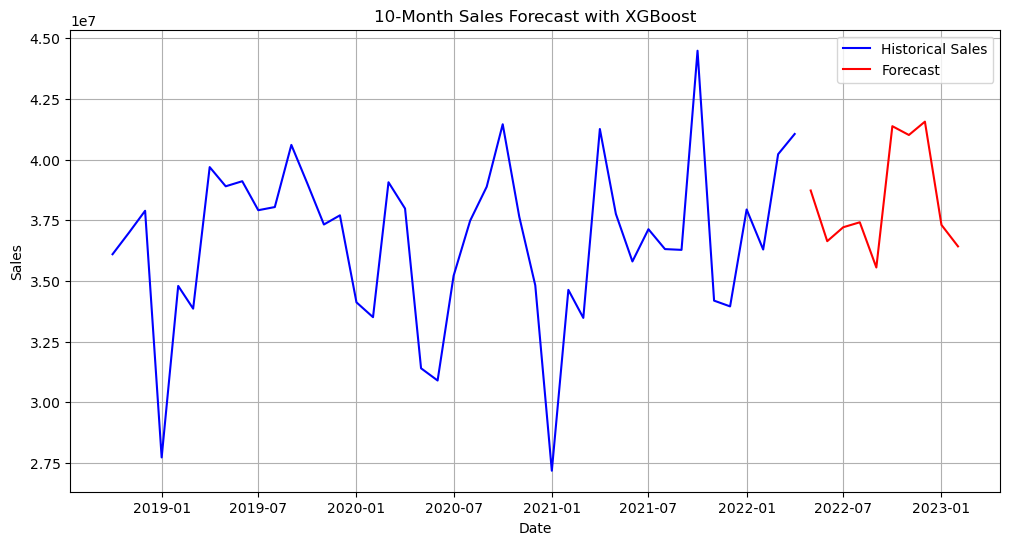

/var/folders/z6/_vn8cndd4x5dmx2cpjfdkjdr0000gn/T/ipykernel_5827/1572899178.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set_1["Sales_EUR"] = results["yhat"]


,Mapped_GCK,Sales_EUR
Month Year,,
2022-03-01,#1,NaN
2022-06-01,#1,36636892.0
2022-07-01,#1,37210896.0
2022-08-01,#1,37415348.0
2022-09-01,#1,35552632.0
2022-10-01,#1,41373964.0
2022-11-01,#1,41011636.0
2022-12-01,#1,41561124.0
2023-01-01,#1,37307848.0


In [49]:
if best_model_name == "XGBoost":
    results = xgboost_forecast(
        sales_agg1,
        df_market_1,
        period=10,
        params =best_params,
    )
else:
    results = prophet_forecast(
        sales_agg1,
        df_market_1,
        period=10,
        param =best_params,
    )
results.set_index('ds',inplace = True)
test_set_1.set_index('Month Year', inplace = True)
test_set_1["Sales_EUR"] = results["yhat"]
test_set_1

In [36]:
test_set_1

,Mapped_GCK,Sales_EUR
Month Year,,
2022-03-01,#1,NaN
2022-06-01,#1,36636892.0
2022-07-01,#1,37210896.0
2022-08-01,#1,37415348.0
2022-09-01,#1,35552632.0
2022-10-01,#1,41373964.0
2022-11-01,#1,41011636.0
2022-12-01,#1,41561124.0
2023-01-01,#1,37307848.0
